# Project: Investigate a Dataset - TMDb Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set, **tmdb.csv**, contains information about 10,000 movies collected from **The Movie Database (TMDb)**, including user ratings and revenue. 

The table is made up of the following columns: id, imdb_id,	popularity,	budget,	revenue,	original_title,	cast,	homepage,	director,	runtime,	genres,	production_companies, etc.



### Question(s) for Analysis

__Which movies has the highest vote count?__

__What kinds of properties are associated with movies that have high revenues?__

__Do viewers love movies with high runtime?__

__Do movies with high popularity commensurate with good average ratings?__

__Which year has highest adjusted revenue__

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Assessing dataframe to see some characteristics of the data in it
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

The information above shows that homepage has missing data that is more than 10% of the records. Hence, the need to drop it. Also, some columns are not needed in the analysis such as id, imdb_id, keywords, overview, tagline, and release_date, so, the need to drop it.

In [5]:
# this drop the some of the columns that will not be needed in the analysis
df.drop(['id', 'imdb_id', 'homepage', 'keywords', 'overview', 'tagline', 'release_date'], axis=1, inplace=True)
df.shape

(10866, 14)

In [6]:
# this is used to check the number of missing data in each columns
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# this drops the rows in the dataframe with misssing data 
df.dropna(axis=0, inplace=True)

In [8]:
# this check to ensure all the missing data are removed
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [9]:
df.shape

(9773, 14)

In [10]:
# Check for duplicates to avoid redundancy in the data
sum(df.duplicated())

1

In [11]:
# this removes duplicate row(s) in the dataframe
df.drop_duplicates(inplace=True)

In [12]:
# check if the duplicate has been removed
sum(df.duplicated())

0

In [13]:
#investigate data types of each columns
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [14]:
# Make columns in the dataframe that contain | to become list of each data
# e.g. data|code becomes ['data', 'code']
split_columns = ['cast', 'genres', 'production_companies']
for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("|"))

In [15]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Which movies has the highest vote count?

In [16]:
# check for movies with highest vote count with max()
df.query('vote_count == vote_count.max()')['original_title']

1919    Inception
Name: original_title, dtype: object

The analysis shows that the movie titled **'Inception'** has the highest vote count.

#### Creating Reusabe Functions for Plotting Multiple Bar Charts, Bar Charts, Scatter Diagrams, Histograms and Line Plots

In [17]:
def mulBar(xl, ycol, wid, bl, tit, xlab, ylab, xtic, ycol1, bl1):
    plt.bar(xl, ycol, width=wid, label=bl, color='orange')
    plt.bar(xl+wid, ycol1, width=wid, label=bl1, color='blue')
    plt.title(tit)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(xtic)
    plt.legend()
    plt.show();

In [18]:
def Bar(xl, ycol, tit, xlab, ylab, xtic):
    plt.bar(xl, ycol, tick_label=xtic, alpha=.5)
    plt.title(tit)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show();

In [19]:
def Scatter(hcol, ycol, tit, xlab, ylab):
    plt.scatter(x=hcol, y=ycol)
    plt.title(tit)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show();

In [20]:
def Hist(ycol, tit, xlab, ylab):
    plt.hist(ycol, alpha=.5)
    plt.title(tit)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show();

In [21]:
def Plot(x, y, title, xlabel, ylabel, xtick):
    plt.plot(x, y, 'r+-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(xtick)
    plt.Figure(figsize=(40, 15))
    plt.show();

### What kinds of properties are associated with movies that have high revenues?

In [22]:
# Sorting movies based on the size of the adjusted revenue
high_rev = df.query('revenue_adj >= revenue_adj.mean()')
low_rev = df.query('revenue_adj <= revenue_adj.mean()')

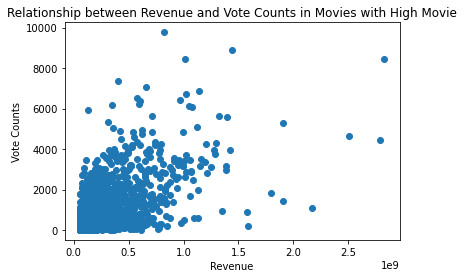

In [23]:
# Checking the relationship between adjusted revenue and the vote counts for movies with high revenue
Scatter(high_rev['revenue_adj'], high_rev['vote_count'], 'Relationship between Revenue and Vote Counts in Movies with High Movie', 'Revenue', 'Vote Counts')

This shows that there is a strong correlation between adjusted revenue and vote counts for high revenue movies most expecially when the revenue is not too high. This will further be inspected with bar chaart, by comparing total vote counts for movies with high revenue with that of low revenue.

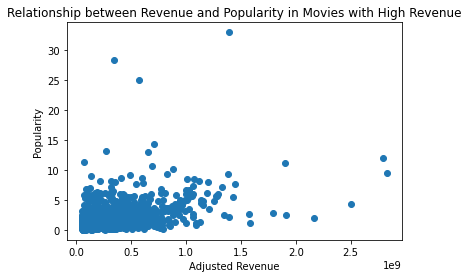

In [24]:
# Shows the correlation between adjusted revenue and the popularity for movies with high revenue
Scatter(high_rev['revenue_adj'], high_rev['popularity'], 'Relationship between Revenue and Popularity in Movies with High Revenue', 'Adjusted Revenue', 'Popularity')

This shows that there is a uniform correlation between popularity and adjusted revenue in movies with high adjusted revenue when the popularity is low but diminishes as the popularity increases and when the adjusted revenue increases.

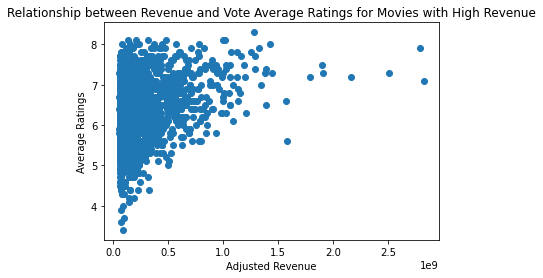

In [25]:
# Shows the correlation between adjusted revenue and the average vote ratings of movies with high revenue
Scatter(high_rev['revenue_adj'], high_rev['vote_average'], 'Relationship between Revenue and Vote Average Ratings for Movies with High Revenue', 'Adjusted Revenue', 'Average Ratings')

There is a close relationship with average vote ratings and adjusted revenue in movies with high revenue.

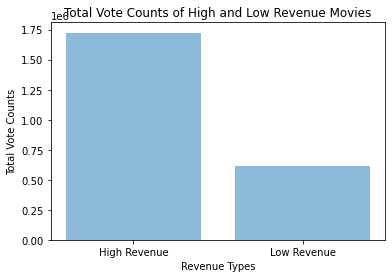

In [26]:
# Plot bar chart to compare total vote counts for movies with high revenue and that with low revenue
Bar(xl=[1,2], ycol=[high_rev.vote_count.sum(), low_rev.vote_count.sum()], tit='Total Vote Counts of High and Low Revenue Movies', xlab='Revenue Types', ylab='Total Vote Counts', xtic=['High Revenue', 'Low Revenue'])

This further shows that movies with high revenue has more vote count compare to that of low revenue.

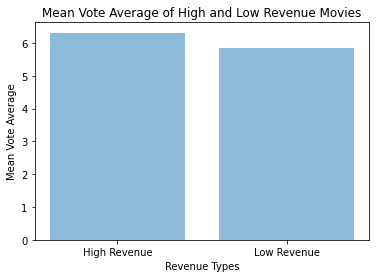

In [27]:
# Plot bar chart of mean average_vote of high and low revenue movies
Bar(xl=[1,2], ycol=[high_rev.vote_average.mean(), low_rev.vote_average.mean()], tit='Mean Vote Average of High and Low Revenue Movies', xlab='Revenue Types', ylab='Mean Vote Average', xtic=['High Revenue', 'Low Revenue'])

This simply shows that movies with high revenue are characterised by good vote average ratings

The associated properties of a high revenue movies from the analysis above are high vote counts, good vote average and high popularity.

### Do viewers love movies with high runtime?

In [28]:
# Compute the mean of the runtime and then sort movies based on their runtime
mean_rt = df.runtime.mean()
high_rt = df.query('runtime >=@ mean_rt')
low_rt = df.query('runtime <=@ mean_rt')

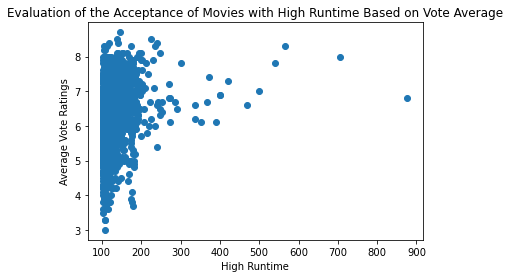

In [29]:
# plot scatter diagram to show correlation between average vote ratings and high runtime
Scatter(high_rt.runtime, high_rt.vote_average, 'Evaluation of the Acceptance of Movies with High Runtime Based on Vote Average', 'High Runtime', 'Average Vote Ratings')

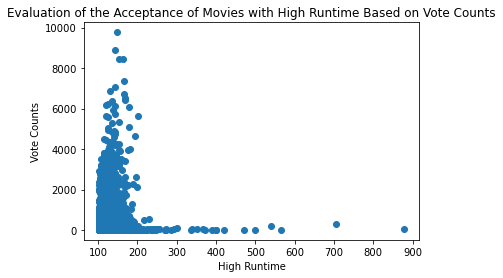

In [30]:
# plot scatter diagram to show correlation between vote counts and high runtime
Scatter(high_rt.runtime, high_rt.vote_count, 'Evaluation of the Acceptance of Movies with High Runtime Based on Vote Counts', 'High Runtime', 'Vote Counts')

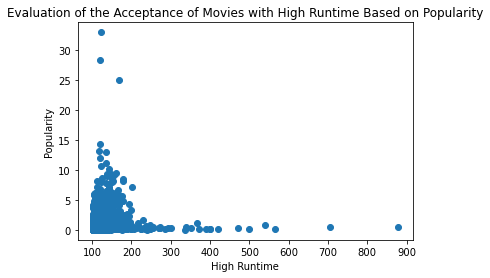

In [31]:
# plot scatter diagram to show correlation between popularity and high runtime
Scatter(high_rt.runtime, high_rt.popularity, 'Evaluation of the Acceptance of Movies with High Runtime Based on Popularity', 'High Runtime', 'Popularity')

The three scatter diagrams shows that people do love movies with high runtime but not that with relatively high runtime. I further inspect this by comparing with a bar chart the mean vote counts for both high and low runtime movies.

In [32]:
# Compute the mean vote counts for both high runtime and low runtime movies 
mean_vc_hrt = high_rt.vote_count.mean()
mean_vc_lrt = low_rt.vote_count.mean()

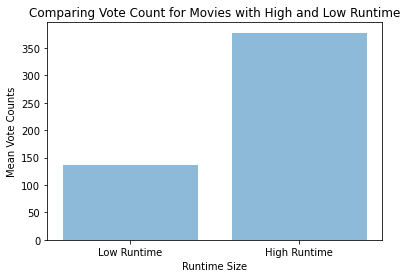

In [33]:
# bar chart to compare mean vote counts for high and low runtime movies
Bar([1,2], [mean_vc_lrt, mean_vc_hrt], 'Comparing Vote Count for Movies with High and Low Runtime', 'Runtime Size', 'Mean Vote Counts', ['Low Runtime', 'High Runtime'])

Yes, viewers love movies with high runtime but not relatively high.

### Which year has the highest adjusted revenue?

In [34]:
# group movies by release year
r_year = df.groupby('release_year', as_index=False).sum()

In [35]:
# Find release year with the highest adjusted revenue
r_year.query('revenue_adj == revenue_adj.max()').release_year

55    2015
Name: release_year, dtype: int64

This shows that the year 2015 is the release year with the highest total adjusted revenue. 
The line plot shows the time series of total adjusted revenue from 1960-2015.

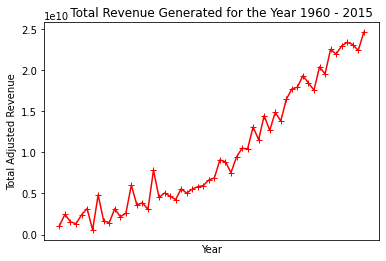

In [36]:
# Plot line graph to show time series of revenues with year
Plot(np.r_[1:57], r_year.revenue_adj, '     Total Revenue Generated for the Year 1960 - 2015', 'Year', 'Total Adjusted Revenue',[])

This line plot shows that the highest adjusted revenue is achieved in the year 2015

In [37]:
year=[]
for i in range(1960, 2016, 1):
    i = ("'" + str(i)[-2:])
    year.append(i)

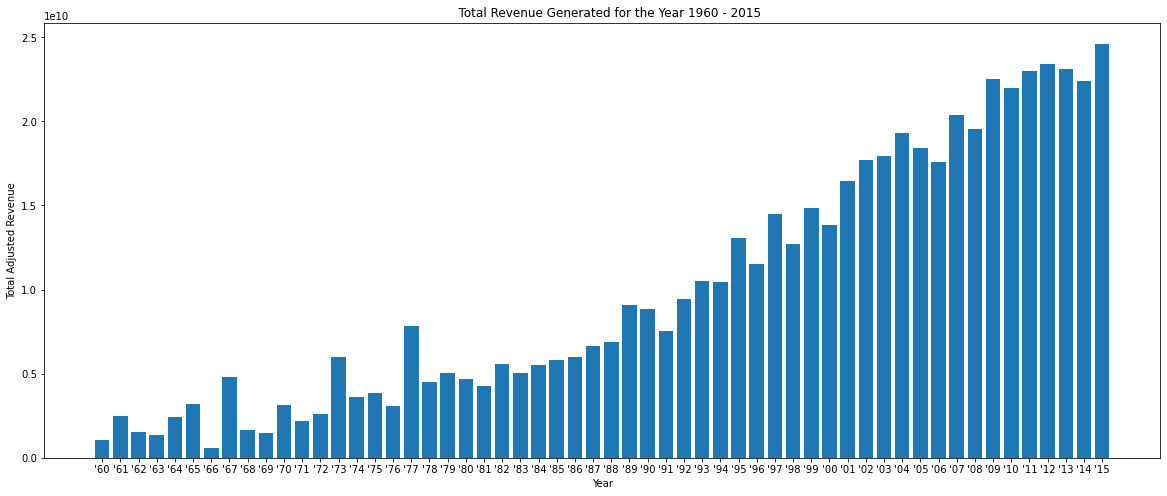

In [38]:
# bar chart to show total revenue for each unique year
plt.bar(np.r_[1:57], r_year.revenue_adj, tick_label=year)
plt.title('    Total Revenue Generated for the Year 1960 - 2015')
plt.xlabel('Year')
plt.ylabel('Total Adjusted Revenue')
plt.gcf().set_size_inches(20, 8)
plt.show();

This bar chart shows the total adjusted revenue from 1960 - 2015. 2015 is the highest bar.

<a id='conclusions'></a>
## Conclusions

> The analysis shows that the movie titled **'Inception'** has the highest vote count. The associated properties of a high revenue movies from the analysis above are high vote counts, good vote average and high popularity.

> The analysis further show that viewers love movies with high runtime but not relatively high and that year 2015 has the highest total adjusted revenue.

> Further insights can be draw from this data using inferential statistics and machine learning.

## Limitations
> Some of the limitations to this analysis are:
>> the homepage columns has over 10% of the records as null.
>>

## Submitting your Project 

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1